In [1]:
import sklearn#import scikit learn

In [2]:
from sklearn.datasets import load_digits

We shall use a dataset extracted from http://archive.isc.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [3]:
digits=load_digits()#This datasets is made of images of handwritten digits
print(digits.images[0])#We print the first image which is a matrix

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


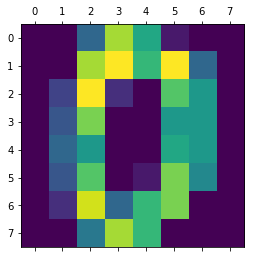

In [5]:
import matplotlib.pyplot as plt#library for graphics$
plt.matshow(digits.images[0])#plot the matrix digits.images[0]


In [6]:
digits.images[0].shape#each image is a 8x8 matrix

(8, 8)

In [7]:
digits.target[0:3]#labels

array([0, 1, 2])

We now understand SVM with python : 

https://scikit-learn.org/stable/modules/svm.html

We first see a basic example

In [40]:
import sklearn
from sklearn.svm import LinearSVC#import the library
X = [[0, 0], [1, 1],[4,6]]#data
y = [0, 1,0]#labels
 

In [39]:
print(X)

[[0, 0], [1, 1], [4, 6]]


In [28]:
clf = LinearSVC()#define the model 
clf.fit(X, y) #fit it

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In our case our X is compounded of matrices that should be transformed into vectors

How can we do that easily? An example

In [29]:
import numpy as np #library allowing to define matrices

In [42]:
M=np.array([[0, 0], [1, 2]])
V=np.reshape(M,[4,1])


Do the same with 

In [51]:
X=digits.images

In [52]:
X.shape

(1797, 8, 8)

What is needed is a vector with 1797 columns and 8x8 lines

In [53]:
data_input=np.reshape(X,[1797,8*8])#We reshape so that we have the right format

In [54]:
label=digits.target

In [55]:
import sklearn
from sklearn.svm import LinearSVC
clf = LinearSVC()#define the model 
clf.fit(data_input, label) #fit it

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

How accurate is the model?

What about adding new observations?

In [56]:
0.7*1797#70% of dataset = 1257 observations

1257.8999999999999

In [59]:
X_train=X[0:1257]#train dataset, to fit the mode
label_train=label[0:1257]
X_test=X[1258:]#test dataset to test its accuracy
label_test=label[1258:]

We do the same as above, reshaping etc..

In [62]:
X_train.shape

(1257, 8, 8)

In [63]:
X_test.shape

(539, 8, 8)

In [64]:
data_train=np.reshape(X_train,[1257,8*8])
data_test=np.reshape(X_test,[539,8*8])

We learn the model on (data_train,label_train)

In [65]:
clf_train = LinearSVC()#define the model 
clf_train.fit(data_train, label_train) #fit it

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

We test it on (data_test,label_test)

In [68]:
#We predict the labels
pred = clf.predict(data_test)

In [81]:
#we compare true labels and predicted ones
#need to import a library
import sklearn.metrics
#need to import the right function
from sklearn.metrics import accuracy_score
#calculate the score
score = sklearn.metrics.accuracy_score(label_test, pred)

In [82]:
print(score)

0.9777365491651205


Very close from 1. It works!!

But maybe we are lucky? 

We check it using Cross Validation

https://scikit-learn.org/stable/modules/cross_validation.html

In [84]:
import sklearn.model_selection
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, data_input, label, cv=5)

In [85]:
print(scores)

[0.91758242 0.87292818 0.93314763 0.92997199 0.88169014]
